## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.452391  1.194126  0.713198  0.442676 -0.620379  0.699820
1  1.199195  0.243251 -1.706201 -1.738197 -0.000762  0.485163
2 -0.195475 -1.316431 -1.206856 -1.265757 -0.599234 -1.685468
3 -1.889075 -0.696870 -1.285448 -1.625500 -0.704474 -2.158413
4 -0.682174  1.028415 -1.144813  1.405852 -1.445281  1.008817


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9936547	total: 46.8ms	remaining: 46.8s
1:	learn: 0.9840121	total: 47.1ms	remaining: 23.5s
2:	learn: 0.9733389	total: 47.6ms	remaining: 15.8s
3:	learn: 0.9625359	total: 48ms	remaining: 12s
4:	learn: 0.9524002	total: 48.4ms	remaining: 9.63s
5:	learn: 0.9404459	total: 48.7ms	remaining: 8.07s
6:	learn: 0.9285926	total: 49.2ms	remaining: 6.98s
7:	learn: 0.9199001	total: 49.6ms	remaining: 6.15s
8:	learn: 0.9108269	total: 50ms	remaining: 5.5s
9:	learn: 0.9021698	total: 50.4ms	remaining: 4.98s
10:	learn: 0.8920838	total: 50.7ms	remaining: 4.56s
11:	learn: 0.8824854	total: 51.1ms	remaining: 4.21s
12:	learn: 0.8728029	total: 51.5ms	remaining: 3.91s
13:	learn: 0.8648010	total: 51.9ms	remaining: 3.65s
14:	learn: 0.8567017	total: 52.2ms	remaining: 3.43s
15:	learn: 0.8488764	total: 52.6ms	remaining: 3.23s
16:	learn: 0.8391310	total: 53ms	remaining: 3.06s
17:	learn: 0.8305240	total: 53.3ms	remaining: 2.91s
18:	learn: 0.8224615	total: 53.6ms	remaining: 2.77s
1

195:	learn: 0.2017221	total: 117ms	remaining: 481ms
196:	learn: 0.2004921	total: 118ms	remaining: 480ms
197:	learn: 0.1995280	total: 118ms	remaining: 479ms
198:	learn: 0.1985493	total: 119ms	remaining: 478ms
199:	learn: 0.1974166	total: 119ms	remaining: 476ms
200:	learn: 0.1964851	total: 119ms	remaining: 475ms
201:	learn: 0.1950512	total: 120ms	remaining: 474ms
202:	learn: 0.1938563	total: 120ms	remaining: 472ms
203:	learn: 0.1921832	total: 121ms	remaining: 471ms
204:	learn: 0.1912069	total: 121ms	remaining: 469ms
205:	learn: 0.1897743	total: 121ms	remaining: 468ms
206:	learn: 0.1886192	total: 122ms	remaining: 466ms
207:	learn: 0.1876028	total: 122ms	remaining: 465ms
208:	learn: 0.1864248	total: 122ms	remaining: 463ms
209:	learn: 0.1854733	total: 123ms	remaining: 462ms
210:	learn: 0.1842125	total: 123ms	remaining: 460ms
211:	learn: 0.1832511	total: 123ms	remaining: 459ms
212:	learn: 0.1822905	total: 124ms	remaining: 458ms
213:	learn: 0.1814391	total: 124ms	remaining: 456ms
214:	learn: 

463:	learn: 0.0465288	total: 219ms	remaining: 253ms
464:	learn: 0.0462895	total: 219ms	remaining: 252ms
465:	learn: 0.0460419	total: 220ms	remaining: 252ms
466:	learn: 0.0459727	total: 220ms	remaining: 251ms
467:	learn: 0.0459044	total: 221ms	remaining: 251ms
468:	learn: 0.0456678	total: 221ms	remaining: 250ms
469:	learn: 0.0453846	total: 221ms	remaining: 250ms
470:	learn: 0.0451599	total: 222ms	remaining: 249ms
471:	learn: 0.0449573	total: 222ms	remaining: 249ms
472:	learn: 0.0447146	total: 223ms	remaining: 248ms
473:	learn: 0.0446480	total: 223ms	remaining: 247ms
474:	learn: 0.0444212	total: 223ms	remaining: 247ms
475:	learn: 0.0442266	total: 224ms	remaining: 246ms
476:	learn: 0.0440108	total: 224ms	remaining: 246ms
477:	learn: 0.0438297	total: 225ms	remaining: 245ms
478:	learn: 0.0437525	total: 225ms	remaining: 245ms
479:	learn: 0.0435062	total: 225ms	remaining: 244ms
480:	learn: 0.0432879	total: 226ms	remaining: 244ms
481:	learn: 0.0430930	total: 226ms	remaining: 243ms
482:	learn: 

736:	learn: 0.0157251	total: 321ms	remaining: 115ms
737:	learn: 0.0156804	total: 322ms	remaining: 114ms
738:	learn: 0.0156226	total: 322ms	remaining: 114ms
739:	learn: 0.0155756	total: 323ms	remaining: 113ms
740:	learn: 0.0155294	total: 323ms	remaining: 113ms
741:	learn: 0.0154262	total: 323ms	remaining: 112ms
742:	learn: 0.0153500	total: 324ms	remaining: 112ms
743:	learn: 0.0153287	total: 324ms	remaining: 111ms
744:	learn: 0.0152806	total: 324ms	remaining: 111ms
745:	learn: 0.0152597	total: 325ms	remaining: 111ms
746:	learn: 0.0151719	total: 325ms	remaining: 110ms
747:	learn: 0.0151163	total: 325ms	remaining: 110ms
748:	learn: 0.0150759	total: 326ms	remaining: 109ms
749:	learn: 0.0150272	total: 326ms	remaining: 109ms
750:	learn: 0.0149290	total: 326ms	remaining: 108ms
751:	learn: 0.0148815	total: 327ms	remaining: 108ms
752:	learn: 0.0148614	total: 327ms	remaining: 107ms
753:	learn: 0.0147661	total: 328ms	remaining: 107ms
754:	learn: 0.0147124	total: 328ms	remaining: 106ms
755:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

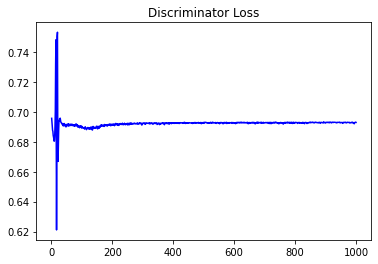

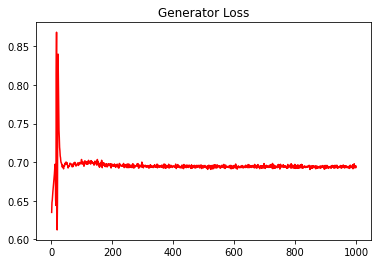

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.21362229956746967


#### Sanity Checks 

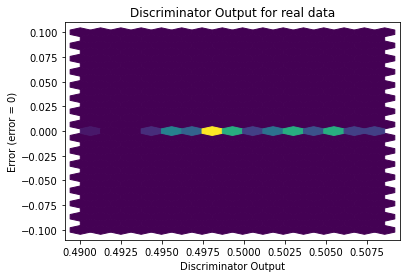

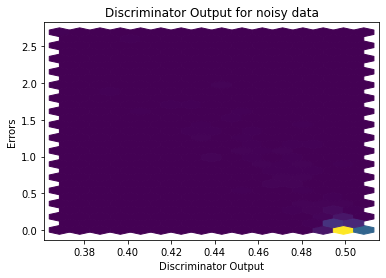

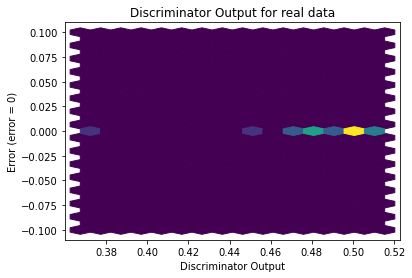

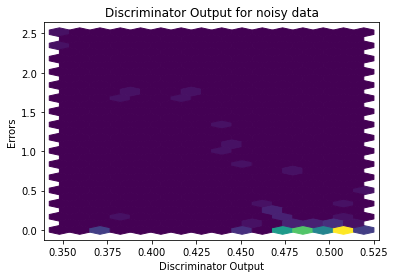

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


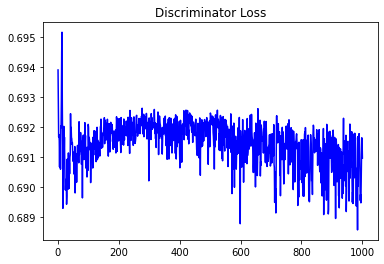

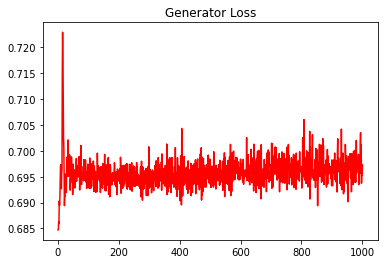

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2943596041672102


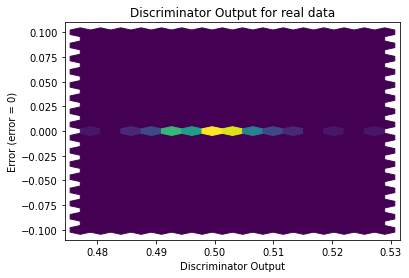

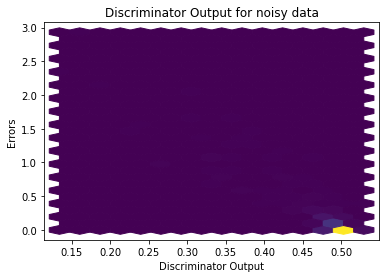

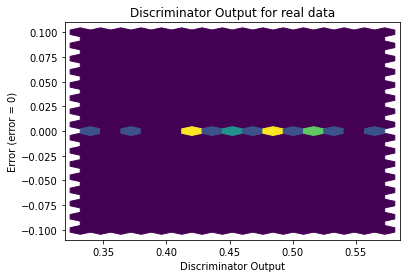

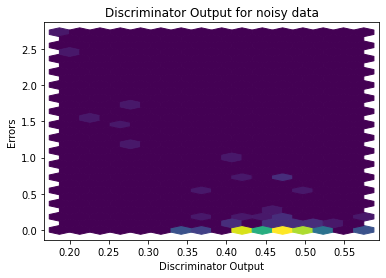

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5964]], device='cuda:0', requires_grad=True)
